In [1]:
#Activate the environment
#conda activate python_course

#Import Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\emili\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


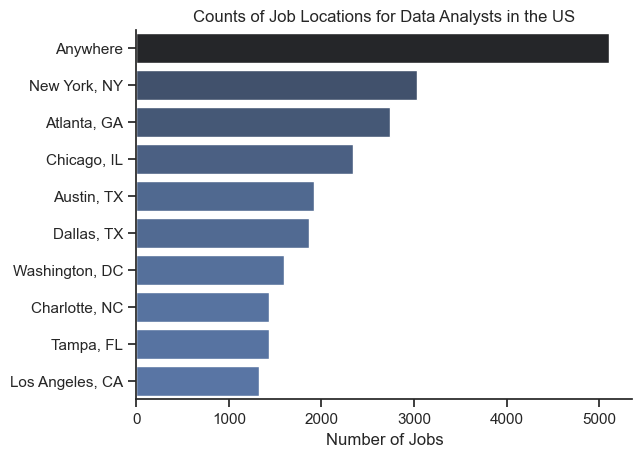

In [4]:
#Filter for US Data Analyst roles
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette='dark:b_r', legend=False)
sns.despine()   # remove the outer board
plt.title('Counts of Job Locations for Data Analysts in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


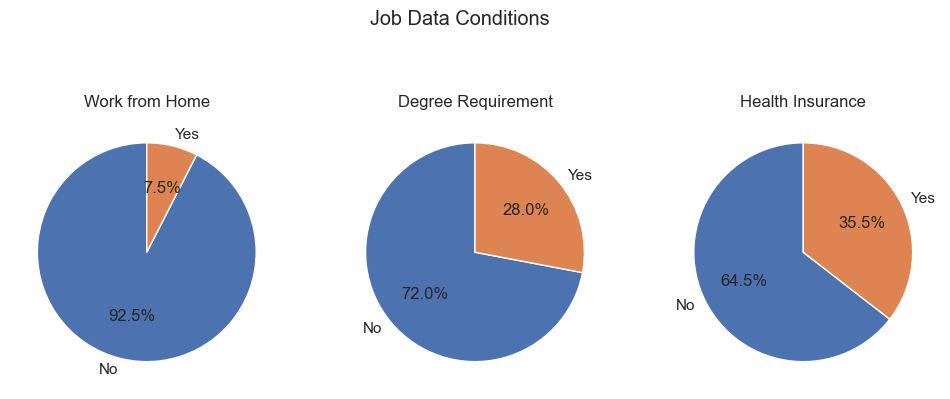

In [8]:
# Vamos fazer 3 graficos de pizza para serem apresentados simultaneamente
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance' 
}

fig,ax = plt.subplots(1,3)           # 1 linha com 3 graficos
fig.set_size_inches((12,5))

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle = 90, autopct ='%1.1f%%', labels=['No','Yes'])
    ax[i].set_title(title)

plt.suptitle('Job Data Conditions')

plt.show()

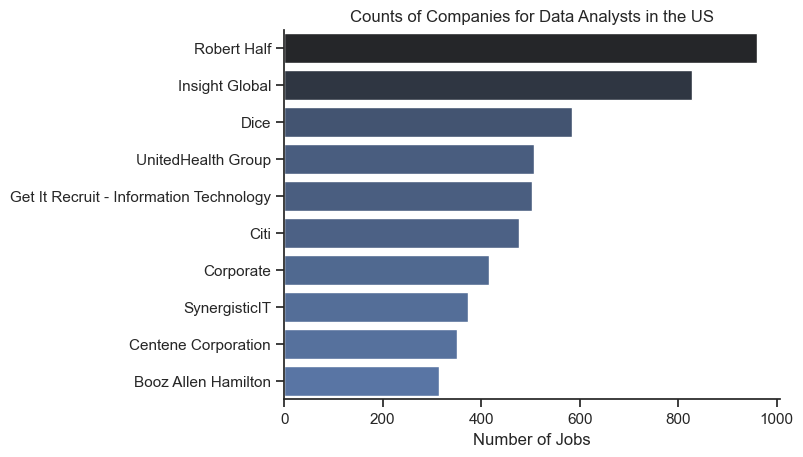

In [9]:
#Filter for Companies
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette='dark:b_r', legend=False)
sns.despine()   # remove the outer board
plt.title('Counts of Companies for Data Analysts in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()
